In [12]:
import pandas as pd
import utils as u
import feature_generation as fg
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/gobel/code/research_env/data/BTCUSD_daily.csv', index_col='timestamp', parse_dates=True)
df = df.drop(['time', 'volumeto', 'conversionType', 'conversionSymbol'], axis=1)
df.columns = ['high', 'low', 'open', 'volume', 'close']
df['vwap'] = u.vwap(df)
df['returns'] = u.returns(df)
df['adv20'] = u.adv(df, 20)
df = df.dropna()
df.tail()

,high,low,open,volume,close,vwap,returns,adv20
timestamp,,,,,,,,
2021-02-07 01:00:00,39721.59,37408.16,39267.01,53823.40,38868.82,38868.82,-0.010141,68776.1285
2021-02-08 01:00:00,46606.82,38063.87,38868.82,138485.21,46437.41,46437.41,0.194721,73277.5165
2021-02-09 01:00:00,48209.59,45051.46,46437.41,98670.48,46509.57,46509.57,0.001554,74895.9395
2021-02-10 01:00:00,47349.86,43743.99,46509.57,72992.80,44854.95,44854.95,-0.035576,72266.2305
2021-02-11 01:00:00,48277.40,44032.66,44854.95,37370.65,47490.41,47490.41,0.058755,68674.2570


In [6]:
alphas = []

for n in range(30):
    name = 'alpha{}'.format(n+1)
    func = 'fg.{}'.format(name)
    temp_func = eval(func)
    df[name] = temp_func(df)

In [10]:
df = df.drop(['alpha1', 'alpha29'], axis=1)
df.tail()

,high,low,open,volume,close,vwap,returns,adv20,alpha2,alpha3,...,alpha20,alpha21,alpha22,alpha23,alpha24,alpha25,alpha26,alpha27,alpha28,alpha30
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-07 01:00:00,39721.59,37408.16,39267.01,53823.40,38868.82,38868.82,-0.010141,68776.1285,0.294340,-0.029553,...,-0.002654,-1,0.791633,-1377.67,-1885.40,0.976811,-0.954786,-1,0.001453,0.077997
2021-02-08 01:00:00,46606.82,38063.87,38868.82,138485.21,46437.41,46437.41,0.194721,73277.5165,0.086026,-0.581246,...,-0.010073,-1,-0.011067,-5617.71,-8127.17,0.003908,-0.954786,-1,0.019611,0.091189
2021-02-09 01:00:00,48209.59,45051.46,46437.41,98670.48,46509.57,46509.57,0.001554,74895.9395,0.220743,-0.646484,...,-0.068434,-1,0.093541,-8488.00,-7242.56,0.021365,-0.954786,-1,0.000582,0.095097
2021-02-10 01:00:00,47349.86,43743.99,46509.57,72992.80,44854.95,44854.95,-0.035576,72266.2305,-0.354398,-0.601745,...,-0.002804,-1,-0.106075,-743.04,-5986.13,0.997134,-0.954786,-1,0.003312,0.105349
2021-02-11 01:00:00,48277.40,44032.66,44854.95,37370.65,47490.41,47490.41,0.058755,68674.2570,-0.145409,-0.187006,...,-0.001141,-1,0.244630,-67.81,-1053.00,0.002084,-0.944444,-1,0.006384,0.103358


<AxesSubplot:>

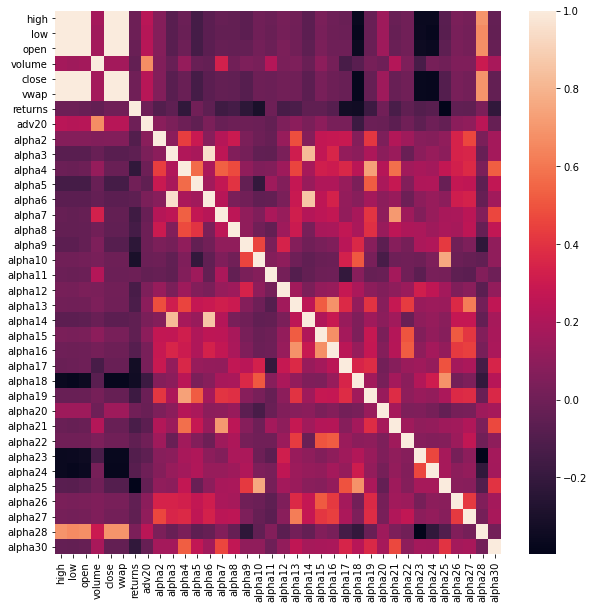

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), xticklabels=1, yticklabels=1)